In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [154]:
%cd /Users/cgu3/Documents/conditional-graph-variational-autoencoder
%pwd

/Users/cgu3/Documents/conditional-graph-variational-autoencoder


'/Users/cgu3/Documents/conditional-graph-variational-autoencoder'

In [179]:
# Read the JSON file line by line into a DataFrame
data = []
with open('results/results.json', 'r') as f:
    for line in f:
        data.append(pd.read_json(line, lines=True))

# Concatenate all the dataframes
df = pd.concat(data, ignore_index=True)

# Convert the DataFrame to a CSV file
# df.to_csv('results.csv', index=False)

/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/513552661.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/513552661.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/513552661.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/513552661.py:5: FutureWarning: Passing literal 

In [180]:
df

,dataset,split_ratio,seed,AUC,AP,execution_time,best_epochs,learning_rate,regularization,neg_sample_ratio,add_false_pos_edge
0,Cora,0.5,36,0.6536,0.5382,5.70,144,0.005,0,1,True
1,Cora,0.5,37,0.6685,0.5672,7.40,235,0.005,0,1,True
2,Cora,0.5,38,0.6852,0.5628,6.46,135,0.005,0,1,True
3,Cora,0.5,36,0.6559,0.5454,5.61,145,0.005,1,1,True
4,Cora,0.5,37,0.6681,0.5641,7.35,235,0.005,1,1,True
5,Cora,0.5,38,0.6848,0.5628,6.32,135,0.005,1,1,True
6,Cora,0.5,36,0.6591,0.5520,5.67,148,0.005,10,1,True
7,Cora,0.5,37,0.6684,0.5659,7.67,235,0.005,10,1,True
8,Cora,0.5,38,0.6880,0.5666,6.45,135,0.005,10,1,True
9,Cora,0.5,36,0.6513,0.5390,7.18,235,0.005,100,1,True


In [181]:
# calculate mean and std for auc and ap group by dataset and split_ratio
df_agg = df.groupby(['dataset', 'split_ratio', 'regularization']).agg({'AUC': ['mean', 'std'], 'AP': ['mean', 'std']})
# ungroup the index
df_agg = df_agg.reset_index()

In [182]:
df_agg[df_agg['dataset'] == 'Cora'].sort_values(by=['split_ratio', 'regularization'], ascending=False)

dataset split_ratio regularization       AUC                  AP          
                                          mean       std      mean       std
6    Cora         0.5         100000  0.501800  0.003118  0.335033  0.008911
5    Cora         0.5          10000  0.733133  0.025324  0.641533  0.027717
4    Cora         0.5           1000  0.729500  0.013153  0.629333  0.007262
3    Cora         0.5            100  0.670067  0.017377  0.557967  0.016622
2    Cora         0.5             10  0.671833  0.014753  0.561500  0.008235
1    Cora         0.5              1  0.669600  0.014508  0.557433  0.010441
0    Cora         0.5              0  0.669100  0.015809  0.556067  0.015629

# plot AUC for each dataset and each split_ratio, with regularization in x-axis



/Users/cgu3/anaconda3/envs/cgvae/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/cgu3/anaconda3/envs/cgvae/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


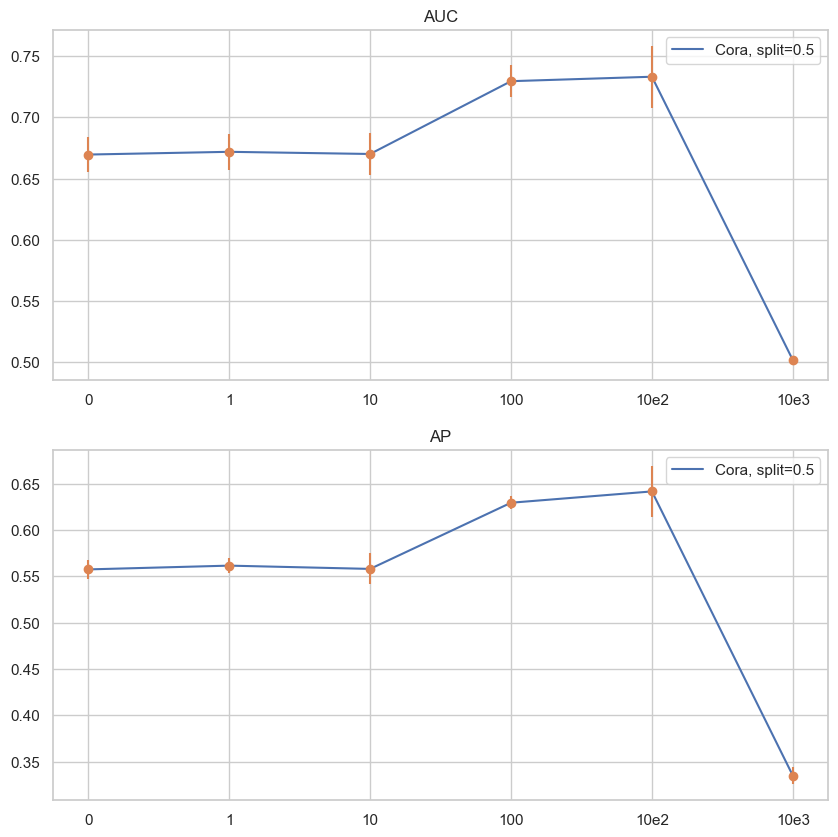

In [197]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
# plot different line for different regularization
# axis 0 plot for AUC
ax[0].plot(np.log10(df_agg[(df_agg['dataset'] == 'Cora')]['regularization']),
           df_agg[(df_agg['dataset'] == 'Cora')]['AUC']['mean'], label='Cora, split=0.5')
# plot error bar
ax[0].errorbar(np.log10(df_agg[(df_agg['dataset'] == 'Cora')]['regularization']),
               df_agg[(df_agg['dataset'] == 'Cora')]['AUC']['mean'],
               yerr=df_agg[(df_agg['dataset'] == 'Cora')]['AUC']['std'], fmt='o')
# x-axis ticks as 0, 1 10, 100, 1000, 10000
ax[0].set_xticks([0, 1, 2, 3, 4, 5], labels=['0', '1', '10', '100', '10e2', '10e3'])
# x-axis label
ax[0].xlabel = 'Regularization'
# title
ax[0].set_title('AUC')
# legend
ax[0].legend()
# plot AP
ax[1].plot(np.log10(df_agg[(df_agg['dataset'] == 'Cora')]['regularization']),
           df_agg[(df_agg['dataset'] == 'Cora')]['AP']['mean'], label='Cora, '
                                                                                                         'split=0.5')
# plot error bar
ax[1].errorbar(np.log10(df_agg[(df_agg['dataset'] == 'Cora')]['regularization']),
               df_agg[(df_agg['dataset'] == 'Cora')]['AP']['mean'],
               yerr=df_agg[(df_agg['dataset'] == 'Cora')]['AP']['std'], fmt='o')
ax[1].set_xticks([0, 1, 2, 3, 4, 5], labels=['0', '1', '10', '100', '10e2', '10e3'])
# x-axis label
ax[1].xlabel = 'Regularization'
# title
ax[1].set_title('AP')
# legend
ax[1].legend()

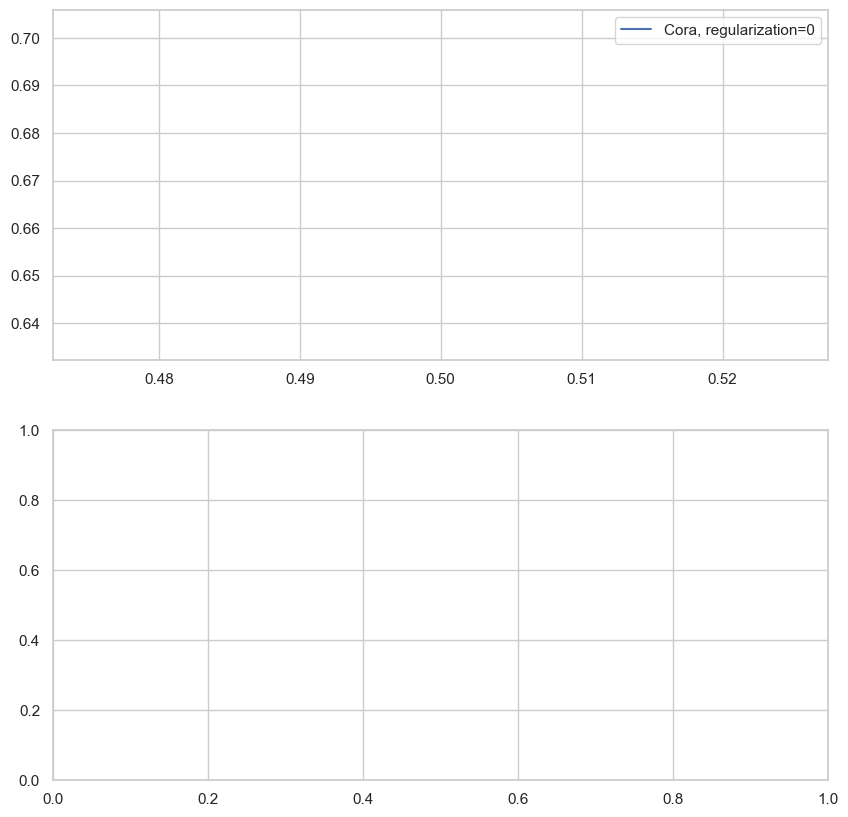

In [185]:
# plot lineplot for AUC and AP for each dataset and split_ratio
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
# plot different line for different regularization
# axis 0 plot for AUC
ax[0].plot(df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 0)]['split_ratio'],
           df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 0)]['AUC']['mean'], label='Cora, '
                                                                                                          'regularization=0')
ax[0].plot(df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 1)]['split_ratio'], 
           df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 1)]['AUC']['mean'], label='Cora, '
                                                                                                         'regularization=1')
ax[0].plot(df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 10)]['split_ratio'],
           df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 10)]['AUC']['mean'], label='Cora, '
                                                                                                         'regularization=10')
ax[0].plot(df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 100)]['split_ratio'],
           df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 100)]['AUC']['mean'], label='Cora, '
                                                                                                          'regularization=100')
ax[0].plot(df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 1000)]['split_ratio'],
           df_agg[(df_agg['dataset'] == 'Cora') & (df_agg['regularization'] == 1000)]['AUC']['mean'], label='Cora, '
                                                                                                           'regularization=1000')
# add legend
ax[0].legend()


In [118]:
# Read the JSON file line by line into a DataFrame
data = []
with open('results/vgae_results.json', 'r') as f:
    for line in f:
        data.append(pd.read_json(line, lines=True))

# Concatenate all the dataframes
df_vgae = pd.concat(data, ignore_index=True)


/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/898799659.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/898799659.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/898799659.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/898799659.py:5: FutureWarning: Passing literal 

In [119]:
# calculate mean and std for auc and ap group by dataset
df_vgae.groupby(['dataset']).agg({'AUC': ['mean', 'std'], 'AP': ['mean', 'std']})

AUC                  AP          
              mean       std      mean       std
dataset                                         
CiteSeer  0.811667  0.009888  0.754300  0.007074
Cora      0.793267  0.007012  0.754633  0.007419
PubMed    0.841800  0.005336  0.790400  0.004814